In [1]:
import pyvisa
import matplotlib
import numpy as np
import scipy
rm = pyvisa.ResourceManager()
print(rm.list_resources())

('GPIB0::25::INSTR', 'GPIB0::26::INSTR')


In [2]:
'''
Use the output from the above cell to rename the resources as necessary. The query commands ensure the keithleys
are online and listening
'''

Keithley = rm.open_resource('GPIB0::25::INSTR')
Keithleygate = rm.open_resource('GPIB0::26::INSTR')
print(Keithley.query('*IDN?'))
print(Keithleygate.query('*IDN?'))

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1197267,C33   Mar 31 2015 09:32:39/A02  /K/J

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1197271,C30   Mar 17 2006 09:29:29/A02  /K/J



Conductance: -7.457223387938791e-11 Siemens


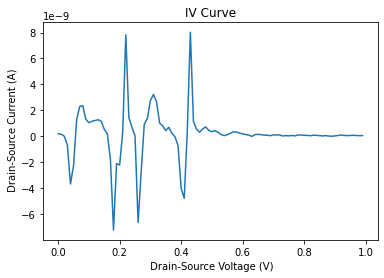

100


In [3]:
%run KeithleyIVSweep.py 0 1 0.01 test.txt source

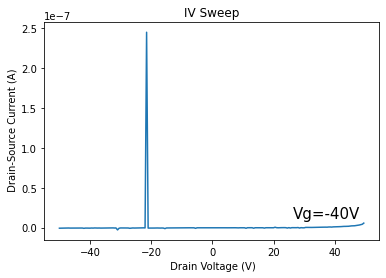

In [12]:
%run KeithleyIVSweepFixedGate.py -50 50 0.5 -40 P1_DCB_HMDS_2500_IdVd_Vgmin40.txt down

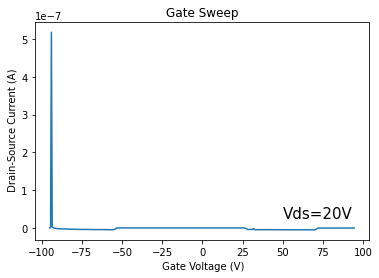

In [22]:
%run KeithleyGateSweepFixedDrain.py -95 95 0.5 20 P1_DCB_HMDS_2500_0mins_IdVg_V20_u.txt up

In [58]:
import os
os.listdir(os.getcwd() + '/data')

['background_IdVd.txt',
 'background_IdVg_down.txt',
 'background_IdVg_up.txt',
 'P1_DCB_HMDS_2500_0mins_IdVg_V20_u.txt',
 'P1_DCB_HMDS_2500_0mins_IdVg_V30.txt',
 'P1_DCB_HMDS_2500_0mins_IdVg_V30_n.txt',
 'P1_DCB_HMDS_2500_0mins_IdVg_Vd20.txt',
 'P1_DCB_HMDS_2500_0mins_IdVg_Vdmin20.txt',
 'P1_DCB_HMDS_2500_0mins_IdVg_Vdmin30.txt',
 'P1_DCB_HMDS_2500_0mins_IdVg_Vdmin30_n.txt',
 'P1_DCB_HMDS_2500_0mins_IdVg_Vdmin30_p.txt',
 'P1_DCB_HMDS_2500_0mins_IdVg_Vdmin50_p.txt',
 'P1_DCB_HMDS_2500_IdVd_Vg20.txt',
 'P1_DCB_HMDS_2500_IdVd_Vg40.txt',
 'P1_DCB_HMDS_2500_IdVd_Vgmin10.txt',
 'P1_DCB_HMDS_2500_IdVd_Vgmin20.txt',
 'P1_DCB_HMDS_2500_IdVd_Vgmin30.txt',
 'P1_DCB_HMDS_2500_IdVd_Vgmin40.txt',
 'P2_IdVd_Vg10.txt',
 'P2_IdVd_Vg20.txt',
 'P2_IdVd_Vg5.txt',
 'P2_IdVd_Vgmin10.txt',
 'P2_IdVd_Vgmin20.txt',
 'P2_IdVd_Vgmin5.txt',
 'P2_IdVg_Vd10.txt',
 'P2_IdVg_Vd20.txt',
 'P2_IdVg_Vdmin10.txt',
 'P2_IdVg_Vdmin20.txt',
 'P2_IdVg_Vdmin30.txt',
 'P3HT_IdVd_Vg5.txt',
 'P3HT_IdVd_Vgmin1.txt',
 'P3HT_IdVd_V

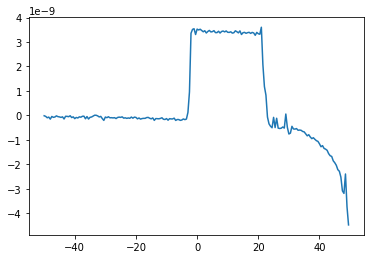

In [81]:
result = np.loadtxt(os.getcwd()+ '/data/' + 'P1_DCB_HMDS_2500_IdVd_Vgmin40.txt')
xval = result[0]
yval = result[1]
plt.plot(xval,yval)

2.177401336760211e-10


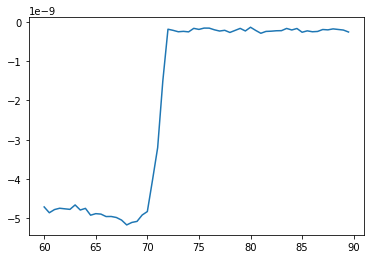

In [72]:
from scipy import stats
startpos = 60
stoppos = 90
mini = np.where(xval == startpos)[0][0]
maxi = np.where(xval == stoppos)[0][0]
if mini < maxi:
    xvalues = xval[mini:maxi]
    yvalues = yval[mini:maxi]
else:
    xvalues = xval[maxi:mini]
    yvalues = yval[maxi:mini]
plt.plot(xvalues,yvalues)
slope, intercept, r_value, p_value, std_error = stats.linregress(xvalues, yvalues)
print(slope)